**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Data Dictionary
RowNumber: Row number.
CustomerId: Unique identification key for different customers.
Surname: Surname of the customer
Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
Geography: The country to which the customer belongs.
Gender: The gender of the customer.
Age: Age of the customer.
Tenure: The period of time a customer has been associated with the bank.
Balance: The account balance (the amount of money deposited in the bank account) of the customer.
NumOfProducts: How many accounts, bank account affiliated products the person has.
HasCrCard: Does the customer have a credit card through the bank?
IsActiveMember: Subjective, but for the concept
EstimatedSalary: Estimated salary of the customer.
Exited: Did they leave the bank after all?

## **Overview of Notebook**

1. Reading Dataset and Feature Elimination

2. Perform an Exploratory Data Analysis on the data

3. Illustrate the insights based on EDA

4. Data Pre-processing

5. Model building

6. Model Performance Improvement

7. Model Performance Evaluation

8. Conclusion and key takeaways 




## **Installing Tensorflow**

In [1]:
!pip install tensorflow

In [2]:
!python --version

Python 3.7.10


In [3]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


## **Sourcing Standard Libraries**

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Reading Dataset and Feature Elimination**


*   Understanding data types - shape, info, unique etc
*   Eliminating the feature not neccesary



In [8]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
dataset_file = project_path + 'bank.csv'

In [9]:
data = pd.read_csv(dataset_file)
data_copy = data.copy()

In [10]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.shape

(10000, 14)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [13]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# **Insights**

*   There are 14 features and 10000 records.
*   CreditScore, Age,Balance,EstimatedSalary - Continous
*   Geography, Gender,HasCrCard,IsActivemember, Exited - Categorical
*   RowNumber,CustomerID,Surname - can be elimiated. 



In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**Distribution of categorical columns among records**

In [17]:
categorical_columns = ['Geography','Gender']

for feature in categorical_columns: 
  print('+'*30)
  print(data[feature].unique())
  print('+'*30)
  print(data[feature].value_counts())

++++++++++++++++++++++++++++++
['France' 'Spain' 'Germany']
++++++++++++++++++++++++++++++
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
++++++++++++++++++++++++++++++
['Female' 'Male']
++++++++++++++++++++++++++++++
Male      5457
Female    4543
Name: Gender, dtype: int64


## Dropping RowNumber, CustomerID, Surname from the data set which does makes value for out prediction. 

In [18]:
data.drop(columns=['RowNumber','CustomerId', 'Surname'],inplace=True)

In [19]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
data['Exited'].nunique()

2

In [21]:
#checking the percentage of each class in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

**Insights**

*  This shows a complete imbalance of classes. There are 80% 'not exited' (0) instances and only 20% 'Exited' (1) instances. This means that we are aiming to predict anomalous events.




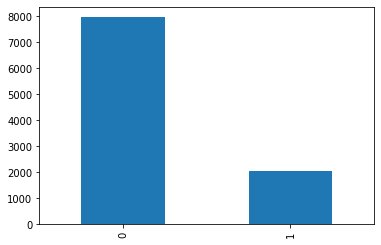

In [22]:
#visual representation of instances per class
data.Exited.value_counts().plot.bar()

# **Exploratory Data Analysis on the data**

In [23]:
def groupby_exited(feature):
    print("Feature %s"%feature)
    grouped_df = data.groupby([feature,'Exited'])['Exited'].count()
    print('+'*100)
    print(grouped_df)
    # print('-'*100)
    print("printing by Percentage")
    print(grouped_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))
    print('+'*100)


In [24]:
groupby_exited('HasCrCard')

Feature HasCrCard
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64
printing by Percentage
HasCrCard  Exited
0          0         79.185059
           1         20.814941
1          0         79.815734
           1         20.184266
Name: Exited, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


**Insights HasCrCard VS Exited**
*   Customers with credit card, doesnot make much difference in exiting the bank. 



In [25]:
groupby_exited('NumOfProducts')

Feature NumOfProducts
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              0           46
               1          220
4              1           60
Name: Exited, dtype: int64
printing by Percentage
NumOfProducts  Exited
1              0          72.285602
               1          27.714398
2              0          92.418301
               1           7.581699
3              0          17.293233
               1          82.706767
4              1         100.000000
Name: Exited, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


**Insights NumofProducts Vs Exited**
* When number of product is 4, customer exited 100% then followed by number of product is 3. 



In [26]:
groupby_exited('Gender')

Feature Gender
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64
printing by Percentage
Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


**Insights Gender Vs Exited**
* Female customer exited bank more than Male by percentage.  

In [27]:
groupby_exited('IsActiveMember')

Feature IsActiveMember
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64
printing by Percentage
IsActiveMember  Exited
0               0         73.149103
                1         26.850897
1               0         85.730926
                1         14.269074
Name: Exited, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


**Insights isactivemember vs exited**
* When customers are not active, the changes of exiting looks greater by 10%. 


In [28]:
groupby_exited('Geography')

Feature Geography
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64
printing by Percentage
Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


**Insights Geography Vs Exited**
* Germany customers exited at 32% while spain and france exited ratio is 16%

**EDA for continous Variable**
* For continous variable, based on range, rounded off to categorical to visualize the data in below section

In [29]:
# Duration of pitch - converting to categorical to get someinsights
print(data.columns)
def custom_round(x, base=30):
    return int(base * round(float(x)/base))

data['CreditScoreRounded'] = data['CreditScore'].apply(lambda x: custom_round(x, base=100))
print('+'*100)
print("Credit Score -  Customer Exited or not ")
G1 = data.groupby(['CreditScoreRounded','Exited'])['Exited'].count()
print(G1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

print('+'*100)
print("Credit Score -  Customer Exited")
G2 = data.groupby(['CreditScoreRounded','Exited','Geography'])['Exited'].count()
print(G2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

print('+'*100)
# print("Designation category to duration - product taken turnover")
# G3 = tourDF.groupby(['DurationOfPitchRounded','ProdTaken','DesignationCategory'])['ProdTaken'].count()
# print(G3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

data['CreditScoreRounded'] = pd.Categorical(data['CreditScoreRounded'])

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Credit Score -  Customer Exited or not 
CreditScoreRounded  Exited
400                 0         67.724868
                    1         32.275132
500                 0         78.586724
                    1         21.413276
600                 0         79.205258
                    1         20.794742
700                 0         80.843023
                    1         19.156977
800                 0         80.221811
                    1         19.778189
Name: Exited, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Credit Score -  Customer Exited
CreditScoreRounded  Exited  Geography
400                 0       France       41.2

**Insights CreditScore Vs Exiting Ratio Vs Geography**
* when creditScore in 400 to 500, the customer exiting bank is higher. 
* when creditscore increases, the customer exiting bank is lesser.

In [30]:
# Rounding Balance

data['BalanceCategory'] = data['Balance'].apply(lambda x: custom_round(x, base=25000))

print("Balance  - Exited turnover")
G1 = data.groupby(['BalanceCategory','Exited'])['Exited'].count()
print(G1)

print('+'*100)
print(G1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

data['BalanceCategory'] = pd.Categorical(data['BalanceCategory'])

Balance  - Exited turnover
BalanceCategory  Exited
0                0         3117
                 1          502
25000            0           12
                 1            7
50000            0          131
                 1           42
75000            0          560
                 1          122
100000           0         1276
                 1          416
125000           0         1522
                 1          553
150000           0          968
                 1          266
175000           0          323
                 1           94
200000           0           49
                 1           30
225000           0            5
                 1            3
250000           1            2
Name: Exited, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BalanceCategory  Exited
0                0          86.128765
                 1          13.871235
25000            0          63.157895
           

**Insights Balance Vs Exiting**
1. balance range of 25K to 75K, exiting bank around 37% and 25%. 
2. Customers with bance more than 200K , also exits around 37% above. 
3. From this distribution 35K to 200K are balance customer exit percent 20% approx stay lows.

In [31]:
# Rounding Age

data['AgeCategory'] = data['Age'].apply(lambda x: custom_round(x, base=10))

print("Age  - Exited turnover")
G1 = data.groupby(['AgeCategory','Exited'])['Exited'].count()
print(G1)

print('+'*100)
print(G1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

data['AgeCategory'] = pd.Categorical(data['AgeCategory'])

Age  - Exited turnover
AgeCategory  Exited
20           0          565
             1           46
30           0         2824
             1          244
40           0         3420
             1          790
50           0          614
             1          615
60           0          311
             1          307
70           0          176
             1           34
80           0           50
             1            1
90           0            3
Name: Exited, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
AgeCategory  Exited
20           0          92.471358
             1           7.528642
30           0          92.046936
             1           7.953064
40           0          81.235154
             1          18.764846
50           0          49.959317
             1          50.040683
60           0          50.323625
             1          49.676375
70           0          83.809524
             1 

**Insights of Age vs exiting**
* Customers with age 50 to 70 exits the bank around 50% approx
* customers with 20 to 40, exits little as 8% 
* customers with 40 to 50, exits around 19%

In [32]:
# Rounding EstimatedSalary

data['EstimatedSalaryCategory'] = data['EstimatedSalary'].apply(lambda x: custom_round(x, base=25000))

print("EstimatedSalaryCategory  - Exited turnover")
G1 = data.groupby(['EstimatedSalaryCategory','Exited'])['Exited'].count()
print(G1)

print('+'*100)
print(G1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

data['EstimatedSalaryCategory'] = pd.Categorical(data['EstimatedSalaryCategory'])

EstimatedSalaryCategory  - Exited turnover
EstimatedSalaryCategory  Exited
0                        0          508
                         1          119
25000                    0          964
                         1          260
50000                    0         1002
                         1          241
75000                    0         1032
                         1          251
100000                   0         1011
                         1          249
125000                   0         1008
                         1          254
150000                   0          962
                         1          252
175000                   0          973
                         1          277
200000                   0          503
                         1          134
Name: Exited, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
EstimatedSalaryCategory  Exited
0                        0         81.020734


**Estimated Salary Vs customer exiting**
* There is no trend seen here. Almost at all salaary range, they exits around 20%

In [33]:
print('+'*100)
print("CreditScoreRounded VS NumOfProducts Vs Exited")
G3 = data.groupby(['CreditScoreRounded','NumOfProducts','Exited'])['Exited'].count()
display(G3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CreditScoreRounded VS NumOfProducts Vs Exited


CreditScoreRounded  NumOfProducts  Exited
400                 1              0         31.216931
                                   1         23.809524
                    2              0         36.507937
                                   1          4.761905
                    3              0          0.000000
                                   1          2.116402
                    4              0          0.000000
                                   1          1.587302
500                 1              0         37.615989
                                   1         14.703783
                    2              0         40.827980
                                   1          3.854390
                    3              0          0.142755
                                   1          2.569593
                    4              0          0.000000
                                   1          0.285510
600                 1              0         36.331043
                       

**CreditScore Vs Number of Product Vs Exiting**

When customer has 1 product the changes of exiting looks high around 14% 

# **Univariate Analysis**

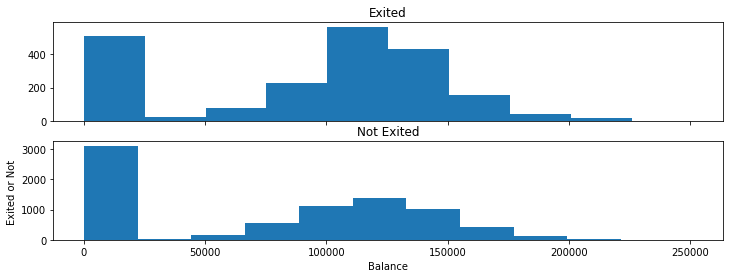

In [34]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Balance"][data["Exited"] == 1], bins = 10)
ax1.set_title('Exited')

ax2.hist(data["Balance"][data["Exited"] == 0], bins = 10)
ax2.set_title('Not Exited')

plt.xlabel('Balance')
plt.ylabel('Exited or Not ')
plt.show()

**Insights**
* Customer with balance between 100K to 125K, leaves bank more. 
* Custmer with balance 0, stay longs relatively observed from the histogram.

**Dropping Categorical features created earlier**

In [132]:
data.columns
data.drop(columns=['CreditScoreRounded', 'BalanceCategory', 'AgeCategory','EstimatedSalaryCategory'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


++++++++++++++++++++ Feature :  CreditScore ++++++++++++++++++++


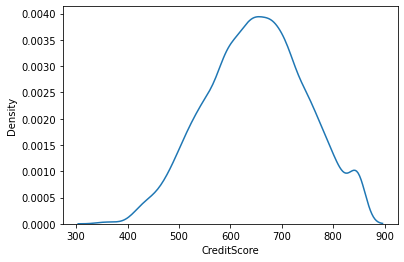

++++++++++++++++++++ Feature :  Age ++++++++++++++++++++


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


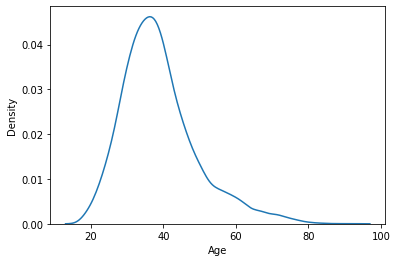

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


++++++++++++++++++++ Feature :  Tenure ++++++++++++++++++++


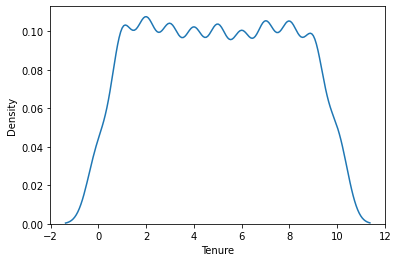

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


++++++++++++++++++++ Feature :  Balance ++++++++++++++++++++


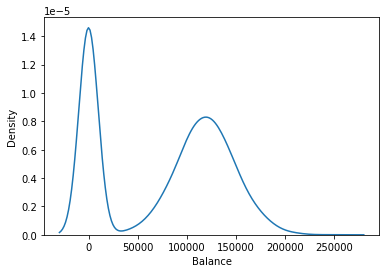

++++++++++++++++++++ Feature :  NumOfProducts ++++++++++++++++++++


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


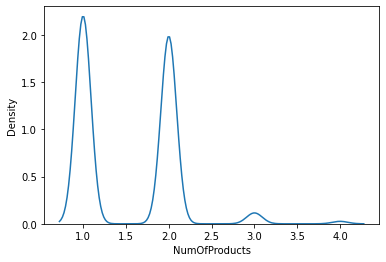

++++++++++++++++++++ Feature :  HasCrCard ++++++++++++++++++++


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


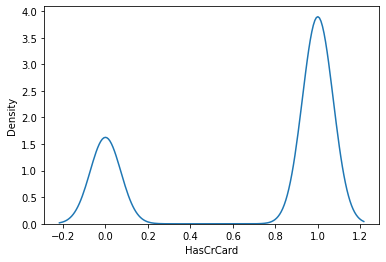

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


++++++++++++++++++++ Feature :  IsActiveMember ++++++++++++++++++++


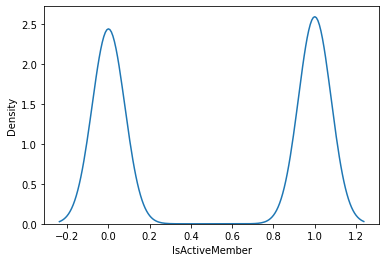

++++++++++++++++++++ Feature :  EstimatedSalary ++++++++++++++++++++


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


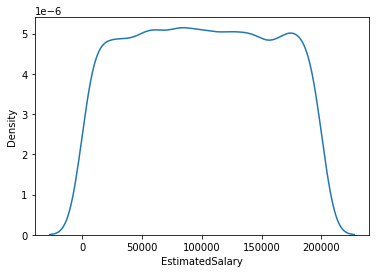

In [134]:
for i in ['CreditScore',   'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']:
    sns.distplot(data[i],hist=False,)
    print("+"*20,"Feature :  %s"%i,"+"*20)
    plt.show()

**Insights of univariate Histogtam**
* Credit score is normal distribution.
* Age and Balance are skewed towards right. 
* Tenure Density stays more static from 0 to 9 years old account.
* Balance has two peaks. If we consider non-zero, then data forms normal distribution. 
* NumOfProducts has two peaks in 1 and 2. 


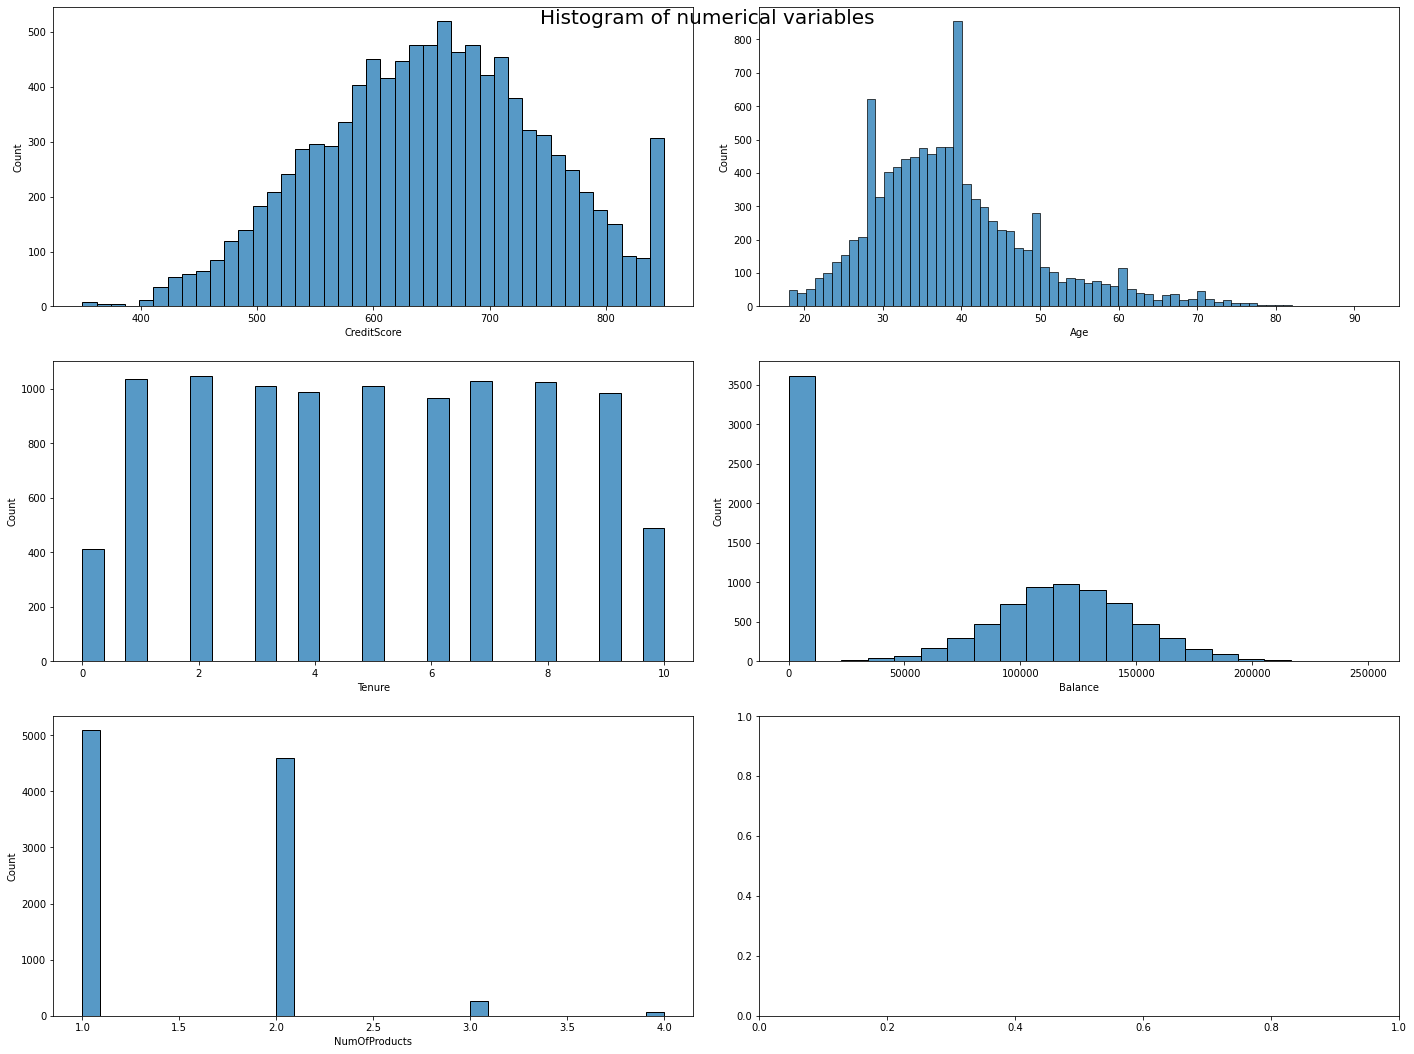

In [136]:
# select numerical columns
all_col = data.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.histplot(ax=axes[ii][0],x=data[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.histplot(ax=axes[ii][1],x=data[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

**Insights**
* Inisights provided above holds good here. 

**Pair Plot Visualization of data**

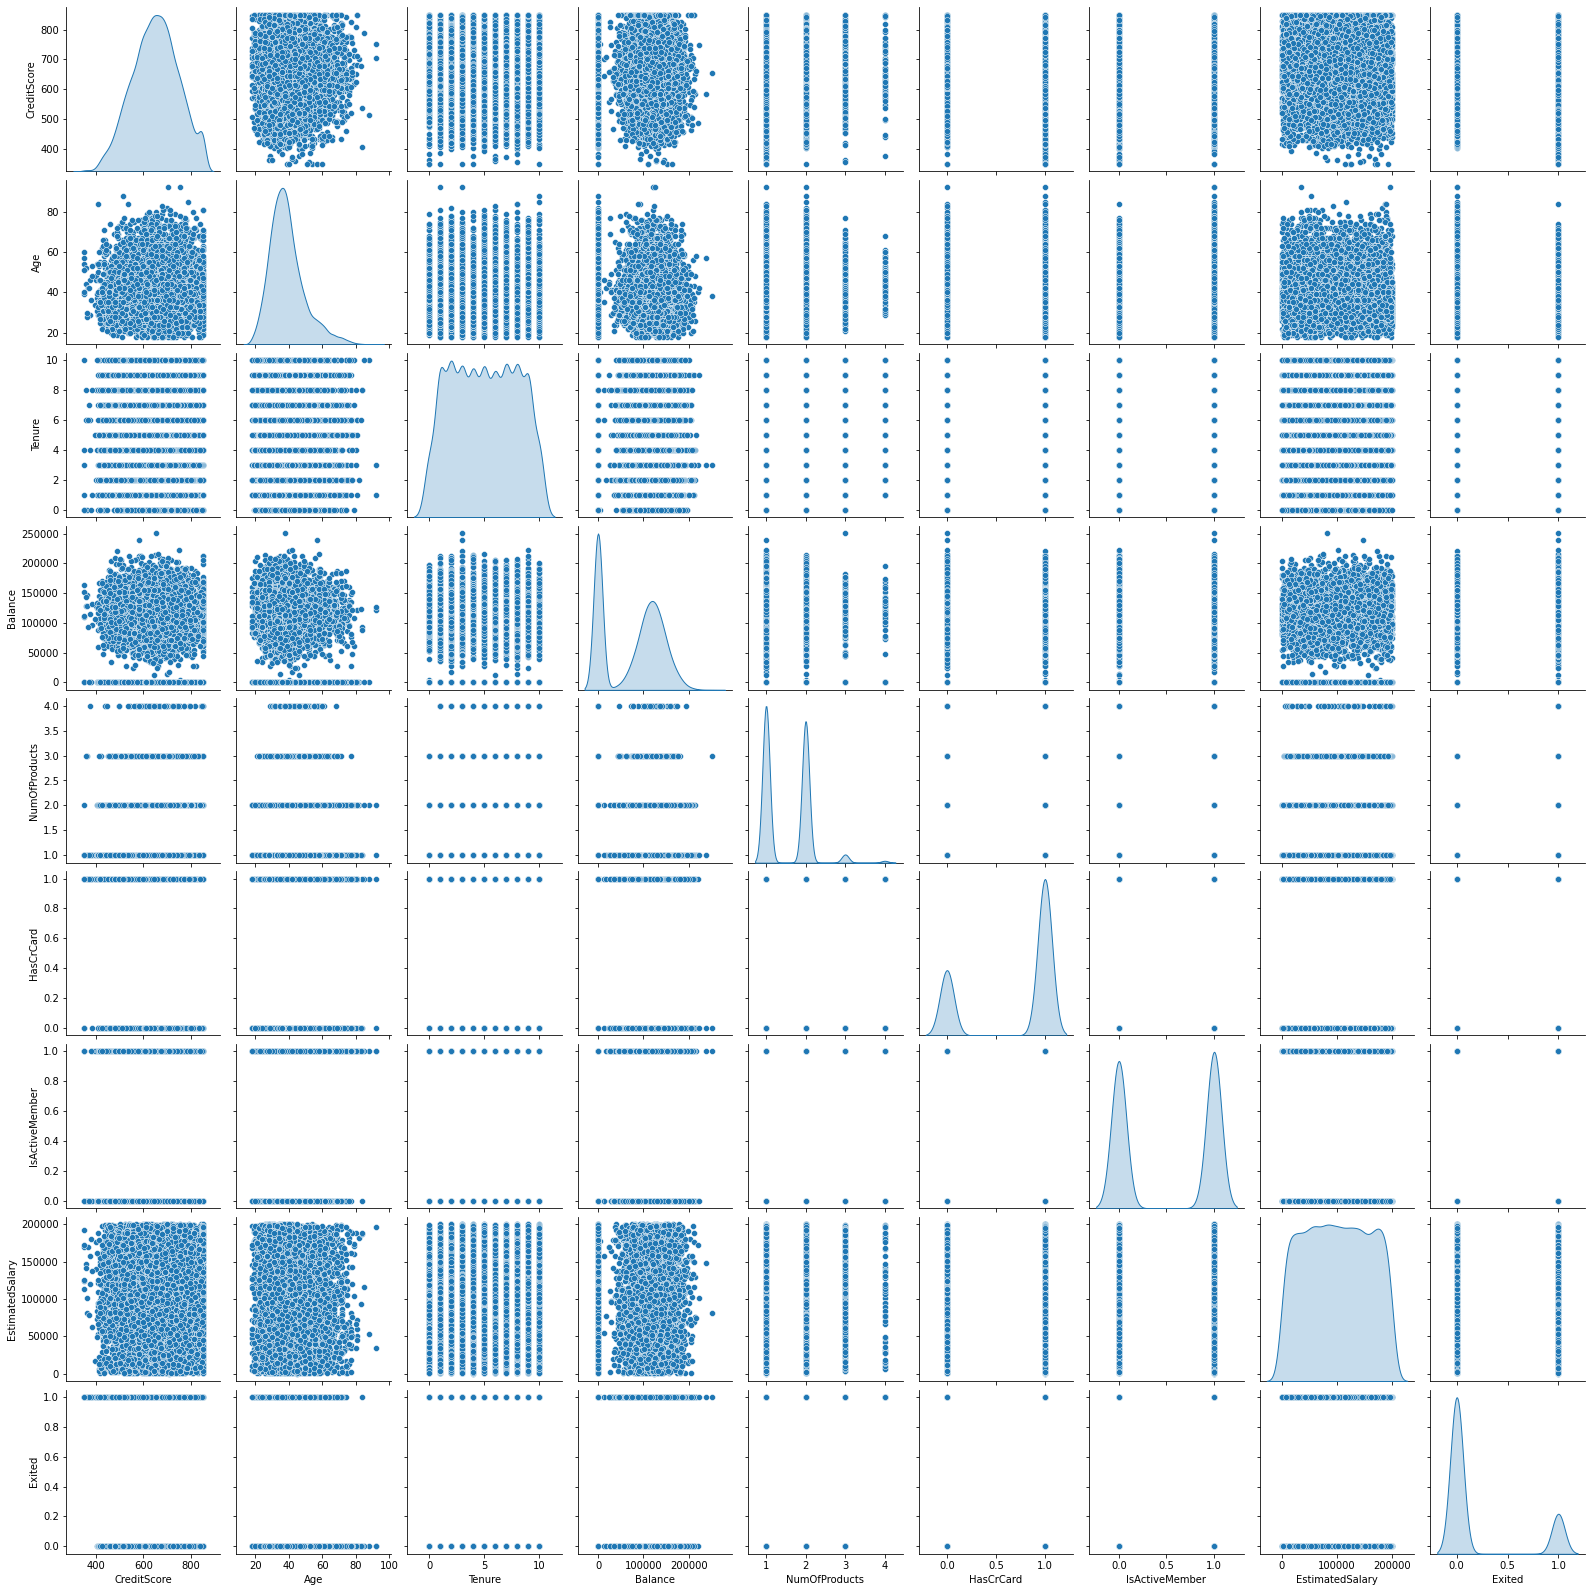

In [137]:
sns.pairplot(data, diag_kind="kde")

In [138]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# **BiVariate Analysis**

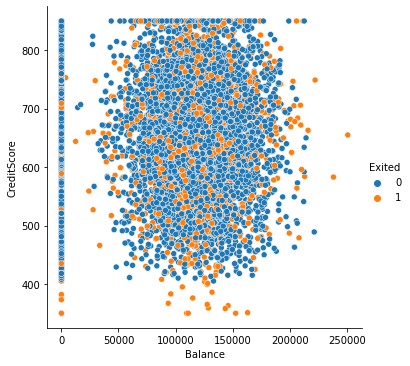

In [141]:
sns.relplot(x="Balance", y="CreditScore",hue="Exited", data=data);

**Insights of Relation plot between balance and creditscore and exited**
* when creditscore is less than 400, customer leaves bank irrespective of balances.
* Customers with balance 100K to 150K, leaves hte bank across credit score.

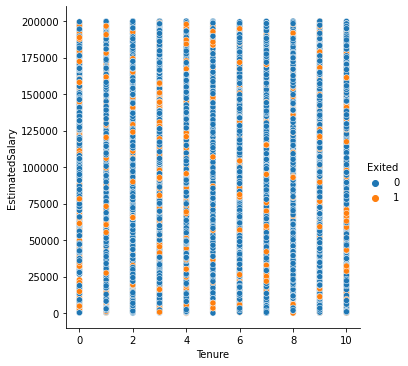

In [37]:
sns.relplot(x="Tenure", y="EstimatedSalary",hue="Exited", data=data);

**Tenure Vs Estimated Salary Vs Exited**

Not much visulaization in the plot

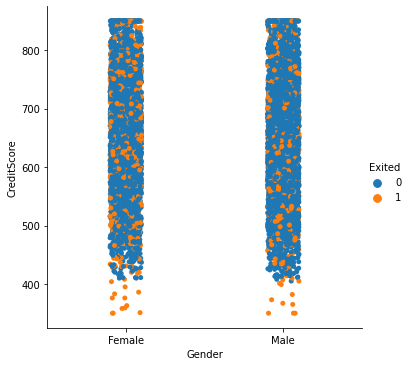

In [143]:
sns.catplot(x="Gender", y="CreditScore",hue="Exited", data=data);

**Insights Gender, Creditscore and Exited **
* Insights same as last described, showing how it looks against gender. 

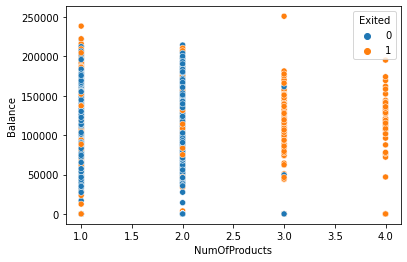

In [145]:
sns.scatterplot(x="NumOfProducts", y="Balance",hue="Exited", data=data);

**Insights of Num of product, Balance and Exited**
* clear visiblity of customer leaves the bank when the number of product taken is 3 or more irrespective of balances in the bank. 

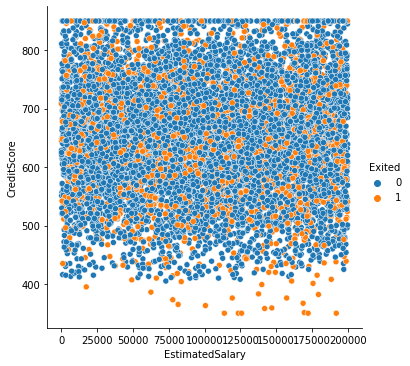

In [147]:
sns.relplot(x="EstimatedSalary", y="CreditScore",hue="Exited", data=data);

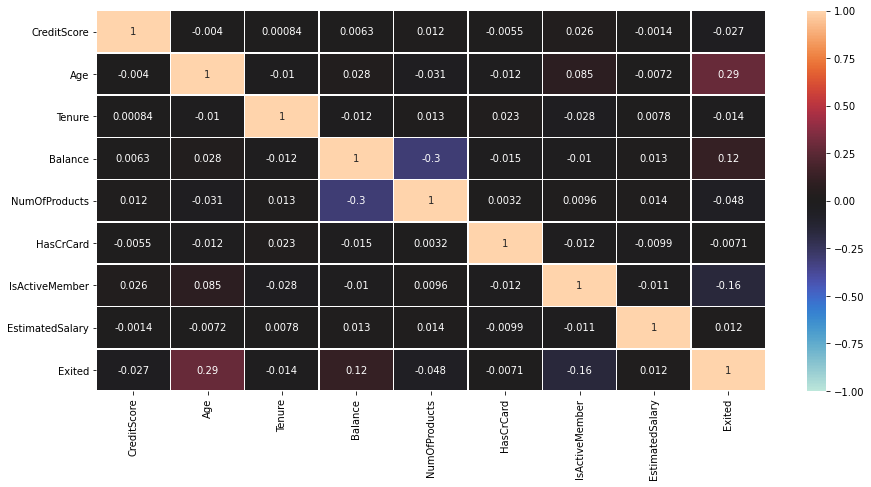

In [152]:
plt.figure(figsize=(15,7))

sns.heatmap(data[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

**Insights of Heat Map**
As seen correleation cannot be much visualized because of imbalanced nature of data.  

# **Data Pre-processing**

Splitting X train and Y Train

X train = 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'

Y_train =  'Exited'

In [124]:
X = data.iloc[:,:10]
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [125]:
y = data.iloc[:,10].values


**One Hot Encoding of Geography and Gender category**

In [126]:
X = pd.get_dummies(X,columns = ['Geography','Gender'])

In [127]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


Geography has three countries, two columns are enough to represent three countries, when two columns are zero it means third country. Hence dropping 'Geography_France' 

In [128]:
X.drop(columns=['Geography_France'],inplace=True)

In [129]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,0,1


**Data Train Split**

In [130]:
# 20% - testing size 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1)

In [131]:
X_train.shape

(8000, 12)

In [132]:
X_test.shape

(2000, 12)

## **Scaling the data**

using standard scaler to fit train and transform test data. To avoid bias to majority class we are doing scaling.

In [133]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
X_train[0]

array([-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
       -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
       -0.91509065,  0.91509065])

**Creating Artificial Neural Network**
* Using Keras library. 
* Units - Number of nodes to add in hidden layer. 
   Average = Input layer + output layer /2 = 12 + 1 / 2 = 6 
* Activation function - relu 
* input dim - has 12
* For first hidden layer - Input layer is feed. 
* For output using sigmoid function. 
* Defining two hidden layer.

In [135]:
classifier = Sequential()

In [136]:
#add input layer and first hidden layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 12))
#add 2nd hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 6, activation = 'relu'))

**Output Layer**

In [137]:

classifier.add(Dense(units = 1, activation = 'sigmoid'))

Metrics:
 * using metrics - accuracy
 * using optimizer - Adam

In [138]:
classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [139]:
classifier.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_250 (Dense)            (None, 6)                 42        
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 6)                 0         
_________________________________________________________________
dense_251 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_252 (Dense)            (None, 1)                 7         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


## Fitting the ANN to the training set

In [140]:
#fitting the model
history=classifier.fit(X_train,y_train,epochs=25,batch_size=5,validation_split=0.2)

Epoch 1/25
1280/1280 [==============================] - 3s 2ms/step - loss: 0.5380 - accuracy: 0.8010 - val_loss: 0.4794 - val_accuracy: 0.7975
Epoch 2/25
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.7911 - val_loss: 0.4578 - val_accuracy: 0.7975
Epoch 3/25
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4611 - accuracy: 0.7959 - val_loss: 0.4507 - val_accuracy: 0.7975
Epoch 4/25
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4596 - accuracy: 0.7984 - val_loss: 0.4425 - val_accuracy: 0.8000
Epoch 5/25
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4523 - accuracy: 0.8064 - val_loss: 0.4387 - val_accuracy: 0.8056
Epoch 6/25
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4508 - accuracy: 0.8024 - val_loss: 0.4393 - val_accuracy: 0.8031
Epoch 7/25
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4288 - accuracy: 0.8123 - val_loss: 0.4438 - val_accuracy:

**validation loss vs train loss**

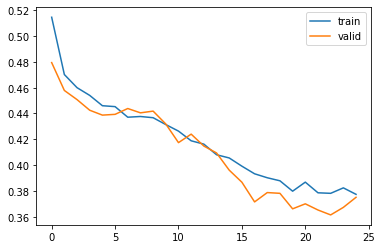

In [141]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [142]:
hist.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'epoch'], dtype='object')

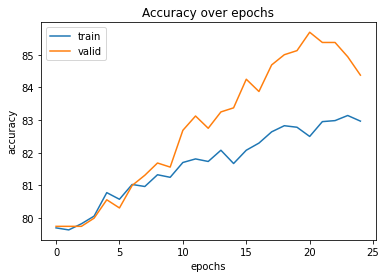

In [143]:
plt.plot(hist['accuracy'] * 100)
plt.plot(hist['val_accuracy'] * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'])
plt.title('Accuracy over epochs')
plt.show()

**Insights on Accuracy**
* Loss for validation is around 38%
* For Validation accuracy max to 85% and train max 83%


# **Making Prediction on test data**

In [144]:
score = classifier.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8550


In [145]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

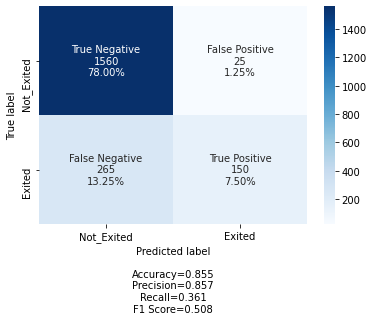

In [146]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred_m1 = classifier.predict(X_test)
for i in range(len(y_test)):
    if y_pred_m1[i]>0.5:
        y_pred_m1[i]=1 
    else:
        y_pred_m1[i]=0



cm2_m1=confusion_matrix(y_test, y_pred_m1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2_m1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Insights**
* Acurracy stands around 85%
* Precision stands aroudn 83%
* Recall stands less, as False negative is more around 13%

**Model Performance Improvement**

**Precision-Recall Curves**
* Choosing precistion recall curve - as data is imbalanced nature

In [110]:
lr_probs = classifier.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.538 auc=0.678


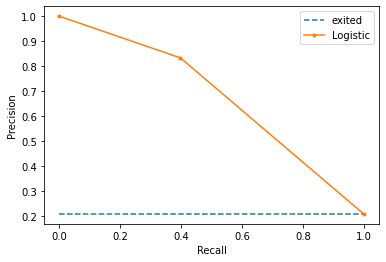

In [111]:
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_pred1)
lr_f1, lr_auc = f1_score(y_test, y_pred1), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
exited = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [exited, exited], linestyle='--', label='exited')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [112]:
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, F-Score=0.538


**Insights**
* F-Score stands 0.538 which looks medium scroe for the best precision and Recall

**Variation - using K-Fold Cross Validation**
* using scikit-learn with keras for cross validation. 


In [ ]:
def build_classifier():
     classifier = Sequential()
     classifier.add(Dense(units = 6,      activation = 'relu', input_dim = 12 ))
     classifier.add(Dense(units = 6,  activation = 'relu'))
     classifier.add(Dense(units = 1,  activation = 'sigmoid'))
     classifier.compile(optimizer = 'adam',loss = "binary_crossentropy",metrics=["accuracy"])
     return classifier
#fit our model to the traing data using KerasClassifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 11, epochs = 10 )
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()

In [ ]:
print(" mean : %s and variance : %s"%(mean,variance))

 mean : 0.8473749995231629 and variance : 0.01780492736066557


**Insights**
* Accuracy is around 84.73% with k-Fold validation

# **Tuning KNN**

In [117]:
def build_classifier(optimizer):
     classifier = Sequential()
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
     return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_



Epoch 1/100
288/288 [==============================] - 10s 1ms/step - loss: 0.6214 - accuracy: 0.7891
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7962
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7956
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.7976
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8071
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8045
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8253
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8252
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8255
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4093 - accur

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
175/288 [=================>............] - ETA: 0s - loss: 0.6693 - accuracy: 0.7777

KeyboardInterrupt: ignored

In [120]:
# Stored offline search values. 



# grid_search = GridSearchCV(cv=10, error_score=nan,
#              estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f426527dc10>,
#              iid='deprecated', n_jobs=None,
#              param_grid={'batch_size': [25], 'epochs': [500],
#                          'optimizer': ['adam', 'rmsprop']},
#              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
#              scoring='accuracy', verbose=0)

best_parameters,best_accuracy = ({'batch_size': 25, 'epochs': 500, 'optimizer': 'rmsprop'}, 0.8432499999999999)



In [121]:
best_parameters,best_accuracy

({'batch_size': 25, 'epochs': 500, 'optimizer': 'rmsprop'}, 0.8432499999999999)

## **From the grid search using parameter to do best tuning **

In [123]:
# bacth_size = 25
# epoch  = 500 
# optimizer = rmsprop

In [90]:
model = Sequential()

In [91]:
#add input layer and first hidden layer
model.add(Dense(units = 6, activation = 'relu', input_dim = 12))
#add 2nd hidden layer
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 6, activation = 'relu'))

In [92]:
model.add(Dense(units = 1, activation = 'sigmoid'))

In [93]:
model.compile(optimizer = 'rmsprop', loss ='binary_crossentropy', metrics = ['accuracy'])

In [94]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_128 (Dense)            (None, 6)                 42        
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 6)                 0         
_________________________________________________________________
dense_129 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 7         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [95]:
history=model.fit(X_train,y_train,epochs=500,batch_size=25,validation_split=0.3)

Epoch 1/500
224/224 [==============================] - 3s 4ms/step - loss: 0.5820 - accuracy: 0.7949 - val_loss: 0.4976 - val_accuracy: 0.7992
Epoch 2/500
224/224 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7857 - val_loss: 0.4767 - val_accuracy: 0.7992
Epoch 3/500
224/224 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8058 - val_loss: 0.4659 - val_accuracy: 0.7992
Epoch 4/500
224/224 [==============================] - 1s 2ms/step - loss: 0.4745 - accuracy: 0.7970 - val_loss: 0.4574 - val_accuracy: 0.7992
Epoch 5/500
224/224 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7936 - val_loss: 0.4498 - val_accuracy: 0.7992
Epoch 6/500
224/224 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.8013 - val_loss: 0.4471 - val_accuracy: 0.7992
Epoch 7/500
224/224 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7901 - val_loss: 0.4381 - val_accuracy: 0.7992

In [96]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.8162 - accuracy: 0.3980


In [97]:
print(score)

[0.8161867260932922, 0.39800000190734863]


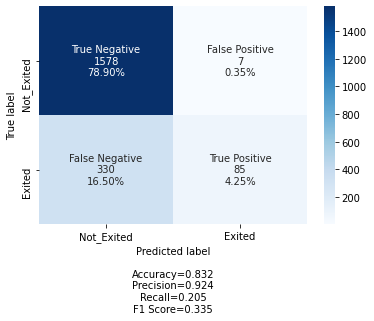

In [86]:
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Insights of final model**
1. Precision has been increased to 92%. 
2. But recal has further decreased to 20%


# **Model Perfromation Evaluation**

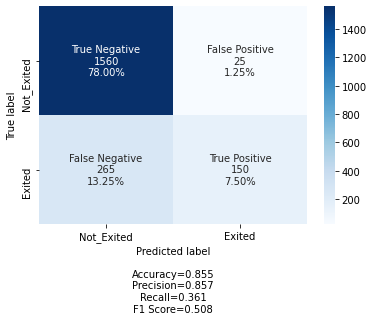

In [147]:
# Model 1 confusion Matrix

make_confusion_matrix(cm2_m1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model1 Vs final tuned model**
1. Model1 with optimizer - adam, metrics -accuracy, activation - relu and units 6 with batch size - 5  epoch- 25
2. Model Final - parameter after tuning  - epochs=500,batch_size=25, 'optimizer': 'rmsprop'.
3. Model1 False negative looks better than final tuned. 
4. Final tuned Precision stands good than the original one. 
 


# **Conclusion and key takeaways**
1. In model prediction, False Negative looks to be trouble some. 
2. From EDA, customers with balance with 100K to 125K chances are exiting are more. 
3. when number of product taken is 3 or more, the chances are more customer leaving are more. 
4. In future customer leaving the bank using the model has 86% accuracy. 
5. When customer is not active member the chances of leaving is increases. 
6. when creditScore in 400 to 500, the customer exiting bank is higher. 